<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:200%;text-align:center;border-radius:15px 15px;">EDA for Credit Risk Prediction</p>

### 1) Problem statement
- To identify loan customers who have high propensity to default and churn them out during approval process for loan.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/nanditapore/credit-risk-analysis
- The data consists of 12 columns and 32k rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/credit_risk.csv')

#### Show Top 5 Records

In [3]:
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


#### Shape of the dataset

In [4]:
df.shape

(32581, 12)

### 2.2 Dataset information

-->Demographics: Age

-> Employment: Employment Length gives idea on how long person is employed

-->Financial Information: Income, Home Details like Own/Rent and Credit History Length offer insights into the applicant's financial stability and credit behavior.

-->Loan Details: The dataset sheds light on the specifics of the loan the applicant is seeking, with details like Loan Amount, Loan Intent, Interest Rate etc

->Default: The customer defaulted on the loan or not


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

Occupation has missing values

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

Id                32581
Age                  58
Income             4295
Home                  4
Emp_length           36
Intent                6
Amount              753
Rate                348
Status                2
Percent_income       77
Default               2
Cred_length          29
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


#### Insight
- From above description of numerical data,age and employment length seems to have some outliers

###  Exploring Data

In [10]:
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [11]:
print("Categories in 'Home' variable: ",end=" " )
print(df['Home'].unique())

print("Categories in 'Intent' variable: ",end=" ")
print(df['Intent'].unique())


Categories in 'Home' variable:  ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Categories in 'Intent' variable:  ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


In [12]:
#Dropping id column
df = df.drop(['Id'], axis=1)

In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Status', 'Percent_income', 'Cred_length']

We have 3 categorical features : ['Home', 'Intent', 'Default']


<a id="3.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Exploring Data ( Visualization )</h3>

In [14]:
#Custom function for univariate analysis of numerical features
def eda_univariate_analysis_numerical(df, numeric_features):
    no_of_num_features = len(numeric_features)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = math.ceil(no_of_num_features / num_cols)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
    
    for i, (col, ax) in enumerate(zip(numeric_features, axes.flat)):
        sns.histplot(data=df, x=col, kde=True, color='green', ax=ax)
        ax.set_title(f'{col} Distribution')
    
    # Remove any empty subplots
    for i in range(no_of_num_features, num_rows * num_cols):
        fig.delaxes(axes.flat[i])
    
    plt.tight_layout()
    
    # Add a line of text
    plt.text(0.5, 0.5, "Boxplots to identify outliers", fontsize=14, ha='center')
    
    
    # Create box plot to identify outliers
    
    for col in numeric_features:
        plt.figure(figsize=(8, 2)) 
        sns.boxplot(data=df, x=col, color='skyblue')
        plt.title(f'{col} Box Plot')
    
    plt.show()
    

In [15]:
#Custom function for univariate analysis of categorical features
def eda_univariate_analysis_categorical(df, categorical_features):

    no_of_cat_features = len(categorical_features)
    num_cols = 2  # Number of columns in the subplot grid (two charts in one row)
    num_rows = math.ceil(no_of_cat_features / num_cols)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    
    for i, col in enumerate(categorical_features):
        row_index = i // num_cols  # Calculate the row index
        col_index = i % num_cols   # Calculate the column index

        sns.countplot(data=df, x=col, ax=axes[row_index, col_index], color='green')
        axes[row_index, col_index].set_title(f'{col} Distribution')
    
    # Remove any empty subplots
    for i in range(no_of_cat_features, num_rows * num_cols):
        fig.delaxes(axes.flat[i])
    
    plt.tight_layout()
    plt.show()

In [16]:
#Custom function for Bivariate analysis of categorical & Numerical features with target variable

def eda_bivariate_analysis(df,categorical_features,numeric_features,target_variable):

    # Exclude the target variable from the numeric features
    if target_variable in numeric_features:
        numeric_features.remove(target_variable)
        
    for feature in numeric_features:
        # Calculate the means for each category of the dependent variable
        means = df.groupby(target_variable)[feature].mean().reset_index()

        # Create a bar plot to visualize the means of the numerical feature by the categorical dependent variable
        plt.figure(figsize=(8, 6))
        sns.barplot(x=target_variable, y=feature, data=means)
        plt.title(f'Means of {feature} by {target_variable}')
        plt.show()
        print(f'Means of {feature} by {target_variable}:\n{means}\n')
    
    
    #To figure out average churn rate for all categorical variables
    df[target_variable].value_counts(normalize = True) 
    
    df_v1 = df
    
    df_v1['Default'] = df_v1['Default'].map({'N':0, 'Y':1})
    
    df_v1['Default'] = df_v1['Default'].astype('int')
    
    if target_variable in categorical_features:
        categorical_features.remove(target_variable)
    
    #To figure out using bivariate analysis some insights on churn 
    for i in categorical_features:
        bivariate_data = df_v1.groupby(i)[target_variable].mean().reset_index()
        print(bivariate_data)
        plt.figure(figsize=(12, 8))
        sns.barplot(x=i, y=target_variable, data=bivariate_data)
        plt.title(i+' vs. Target Variable')
        plt.xticks(rotation=45, ha='right')
        plt.show()    

<a id="3.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Univariate Analysis Numerical Features</h3>

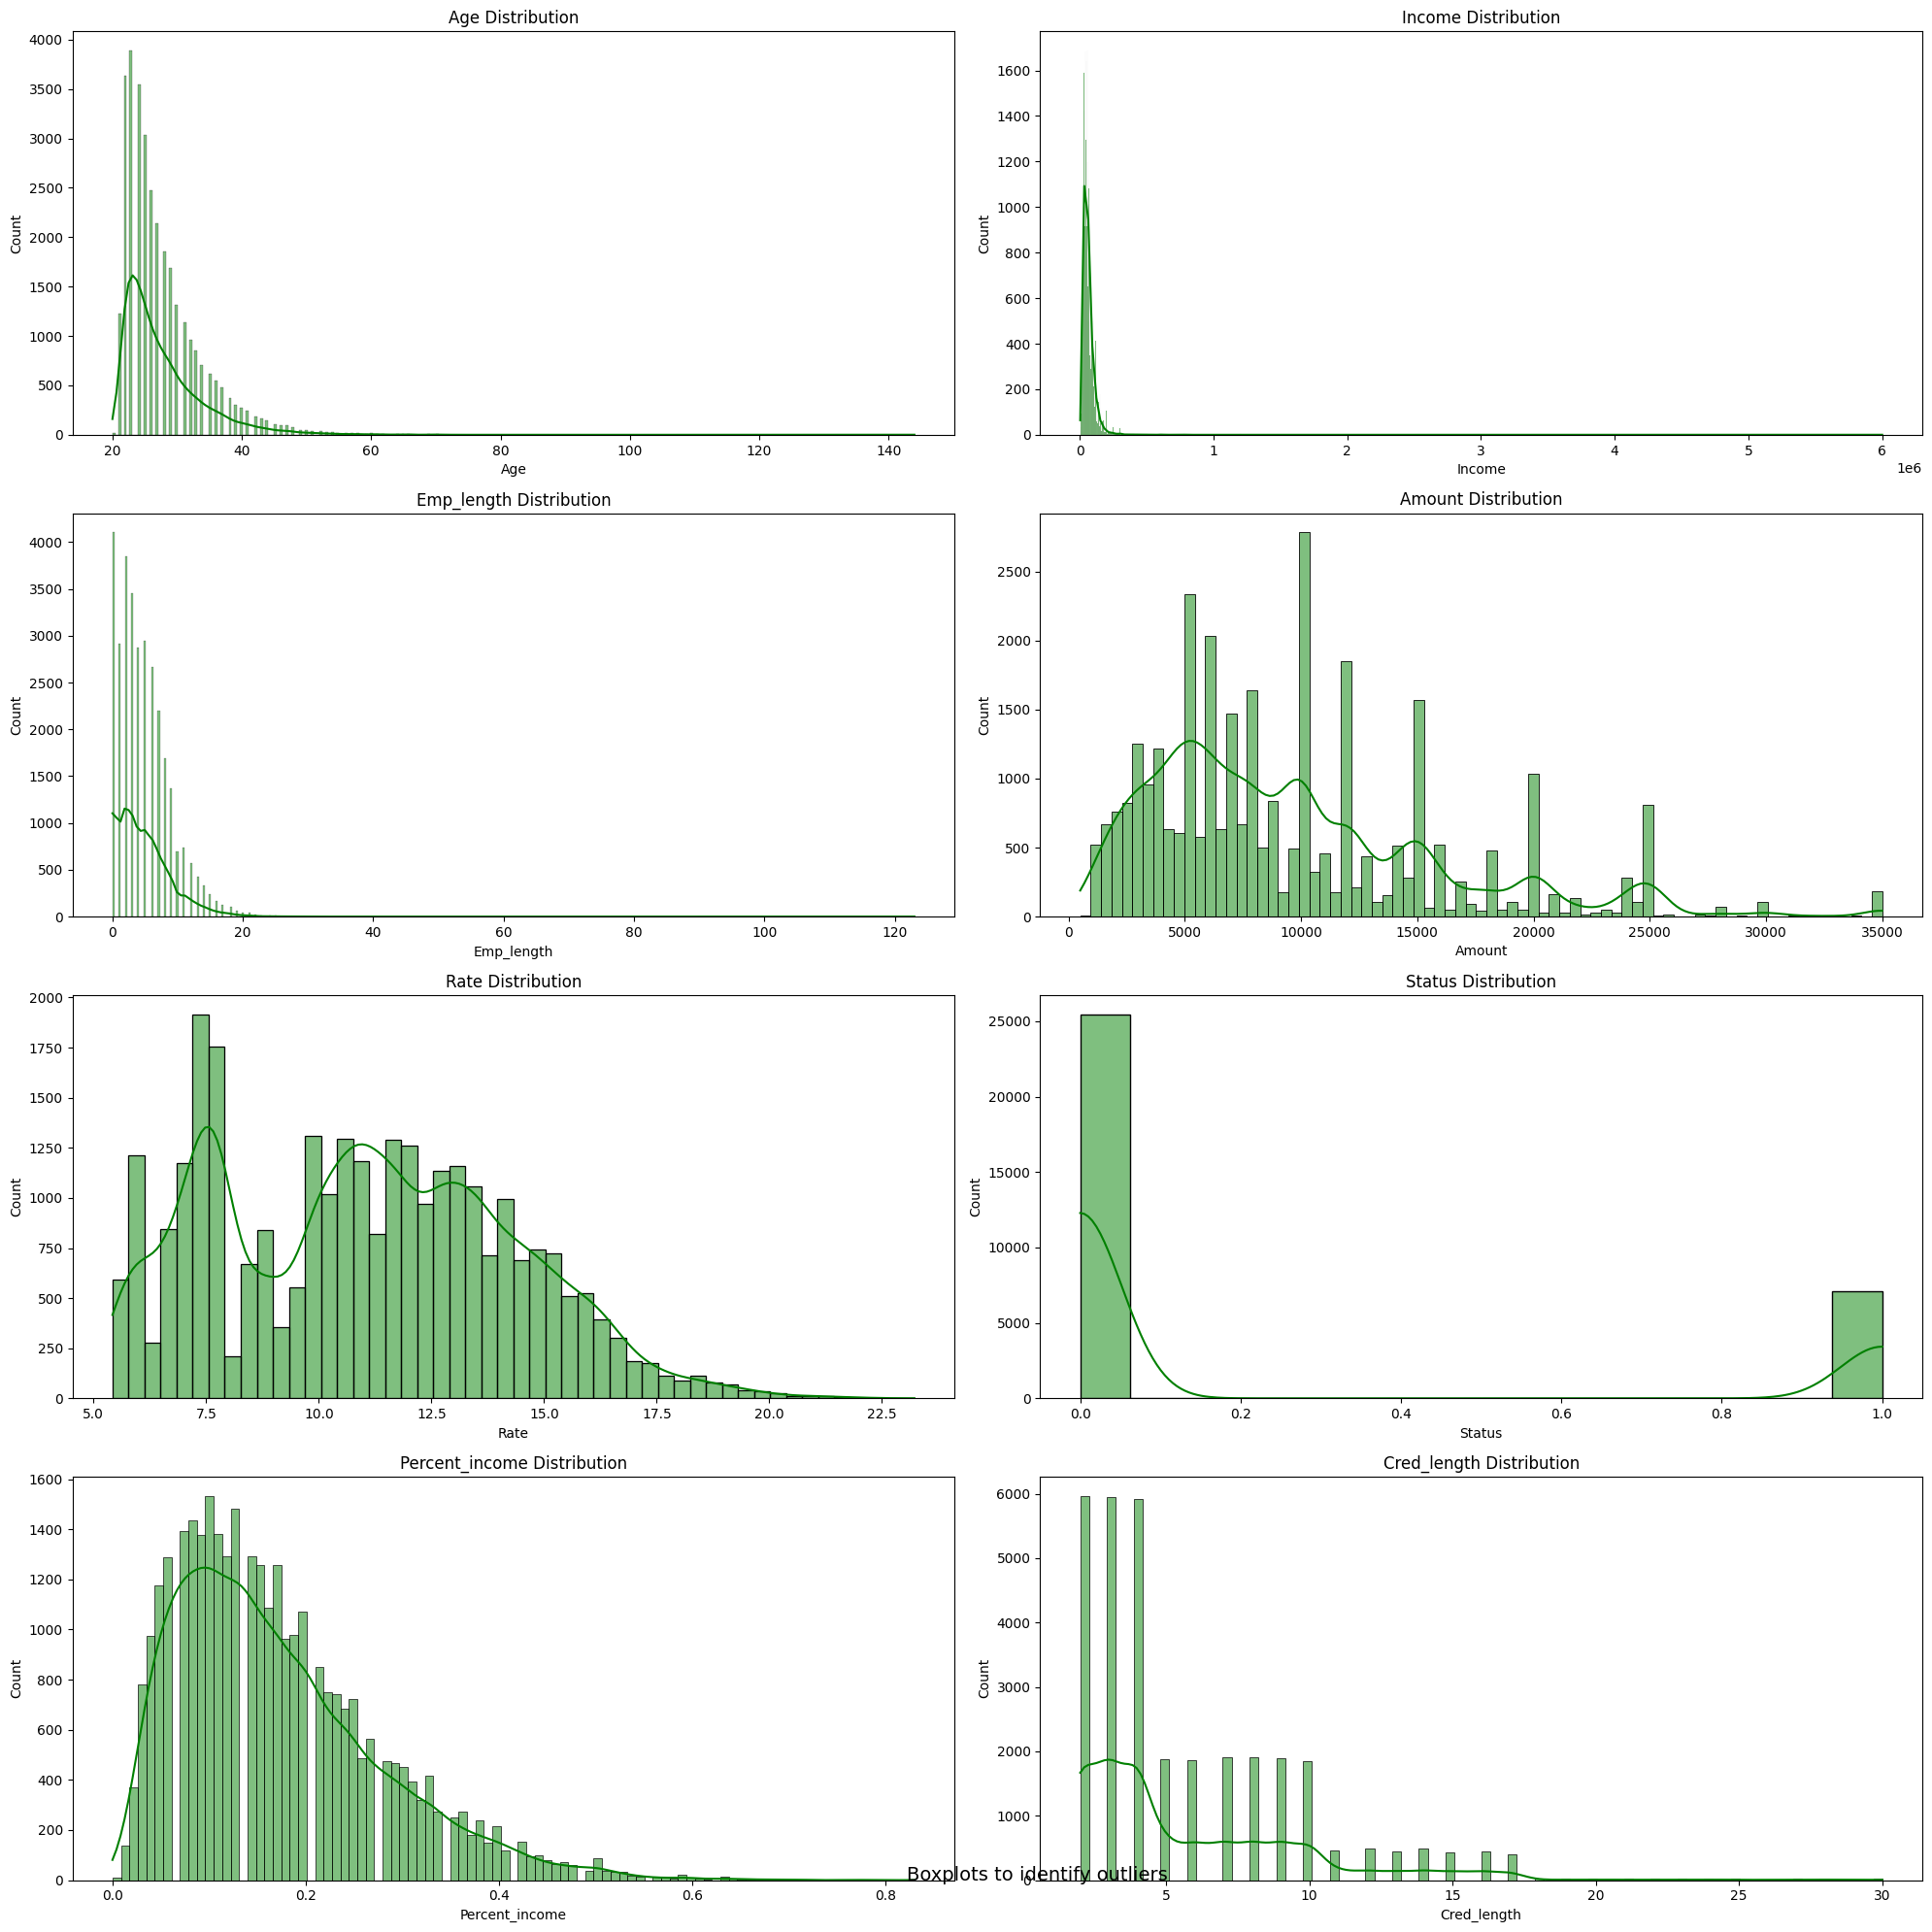

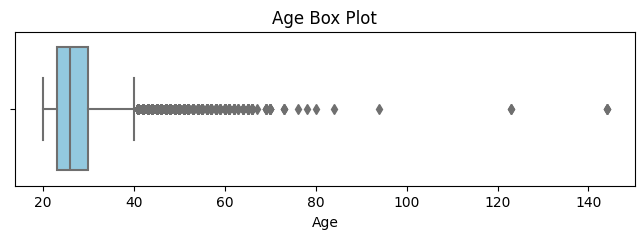

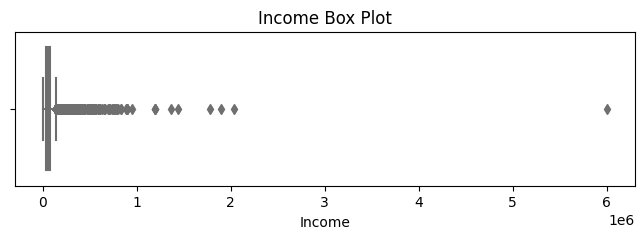

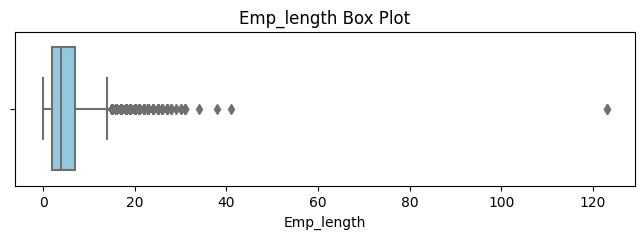

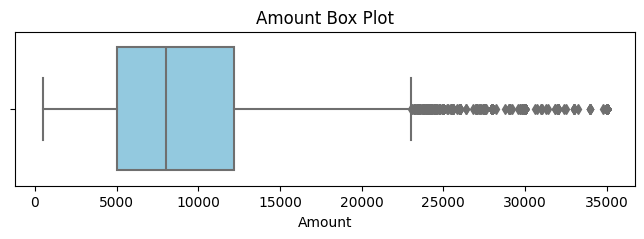

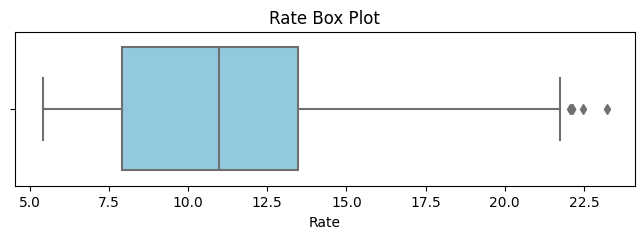

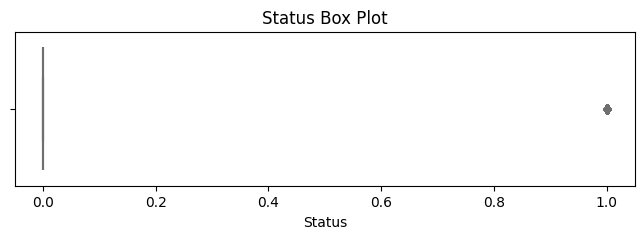

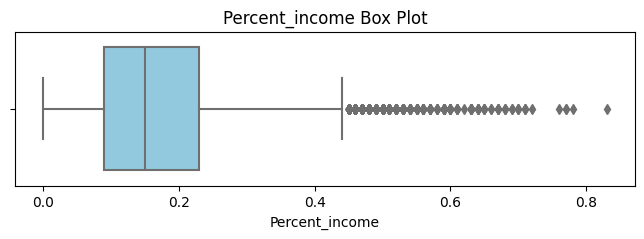

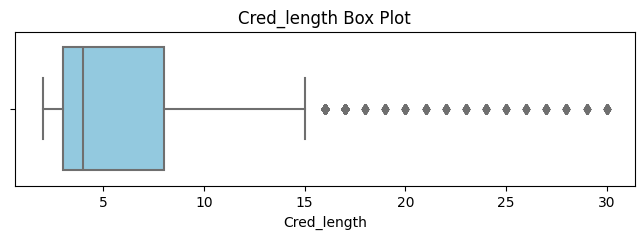

In [17]:
eda_univariate_analysis_numerical(df, numeric_features)

#### Univariate Analysis Insights (Numerical Features)
- Normal Age Range is 20 to 40, age above 80 is outlier
- Income also has quite a few outliers, above 1 million
- Majority applicants have credit length less than 15 year, some outlier above 15

In [18]:
#Fixing few outliers in Age, Income and Emp_length
df = df[(df['Age'] <= 80) & (df['Income'] <= 1000000) & (df['Emp_length'] <= 45)]

In [27]:
df[df.Default == 'Y'].head(10)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
21,25,137000,RENT,9.0,PERSONAL,34800,16.77,0,0.25,Y,2
24,22,80000,RENT,3.0,PERSONAL,33950,14.54,1,0.42,Y,4
26,21,11000,MORTGAGE,3.0,VENTURE,4575,17.74,1,0.42,Y,3
29,21,11389,OTHER,5.0,EDUCATION,4000,12.84,1,0.35,Y,2
32,26,95000,RENT,7.0,HOMEIMPROVEMENT,31050,14.17,1,0.33,Y,3
37,24,64000,RENT,8.0,DEBTCONSOLIDATION,30000,14.54,1,0.47,Y,3
38,25,75000,RENT,4.0,HOMEIMPROVEMENT,30000,16.89,1,0.40,Y,4
43,23,300000,OWN,1.0,EDUCATION,24250,19.41,0,0.08,Y,2
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,30000,NaN,1,0.38,Y,4


<a id="3.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Univariate analysis Categorical Features</h3>

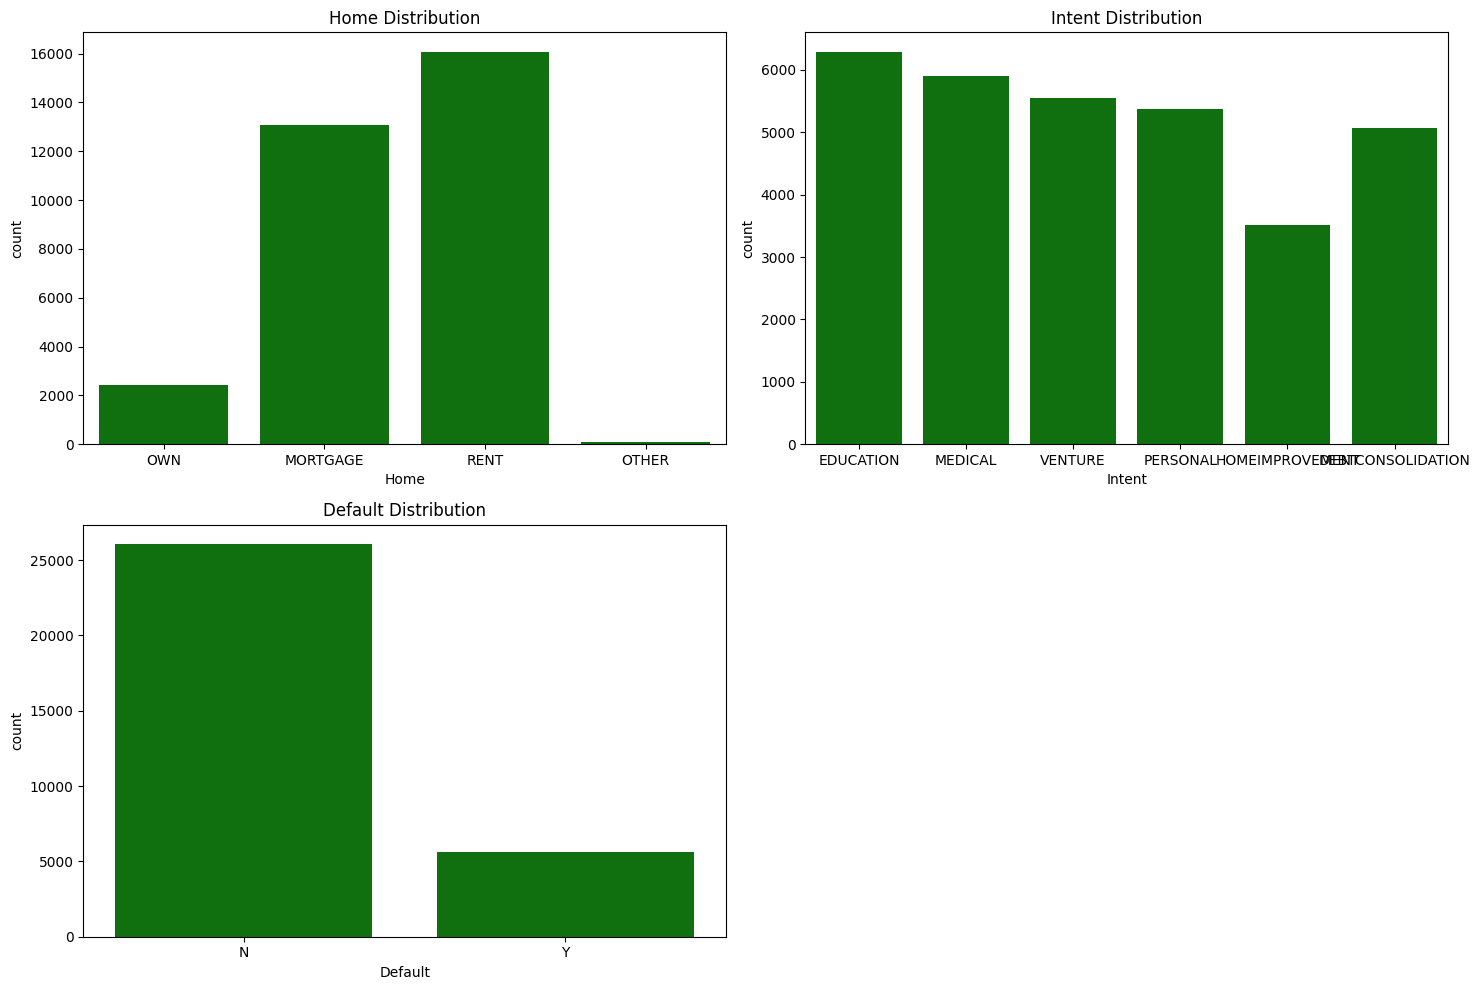

In [157]:
eda_univariate_analysis_categorical(df, categorical_features)

#### Univariate Analysis Insights (Categorical Features)
- Majority applications are for education or medical purpose
- Majority applicants are either living on rent or on Mortgage

<a id="3.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Bivariate analysis with Target Variable</h3>

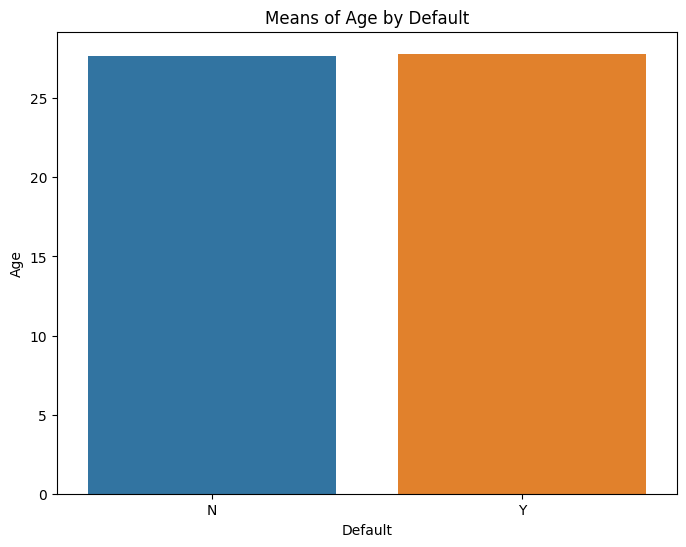

Means of Age by Default:
  Default        Age
0       N  27.701943
1       Y  27.816599



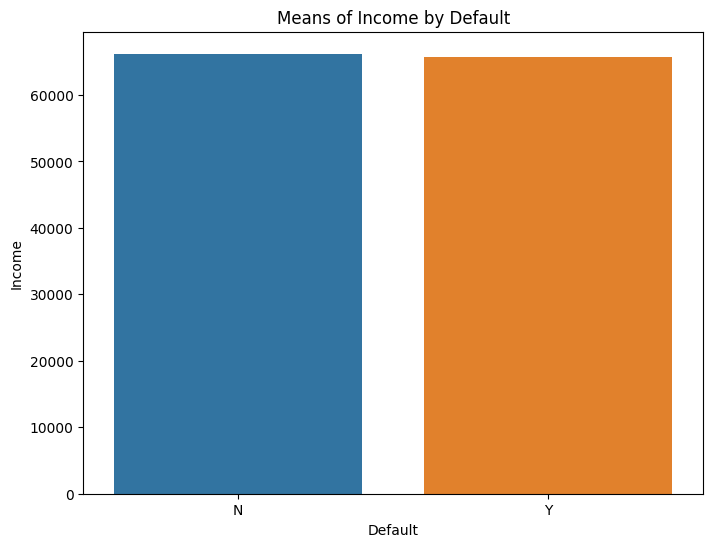

Means of Income by Default:
  Default        Income
0       N  66206.744374
1       Y  65743.954327



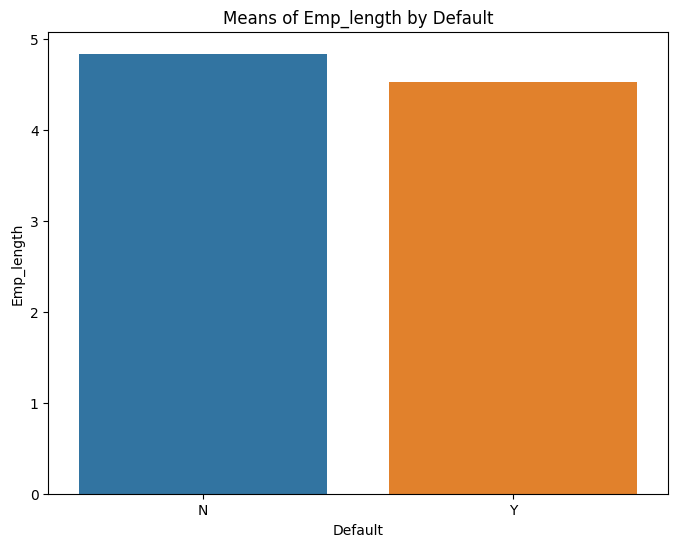

Means of Emp_length by Default:
  Default  Emp_length
0       N    4.837916
1       Y    4.522303



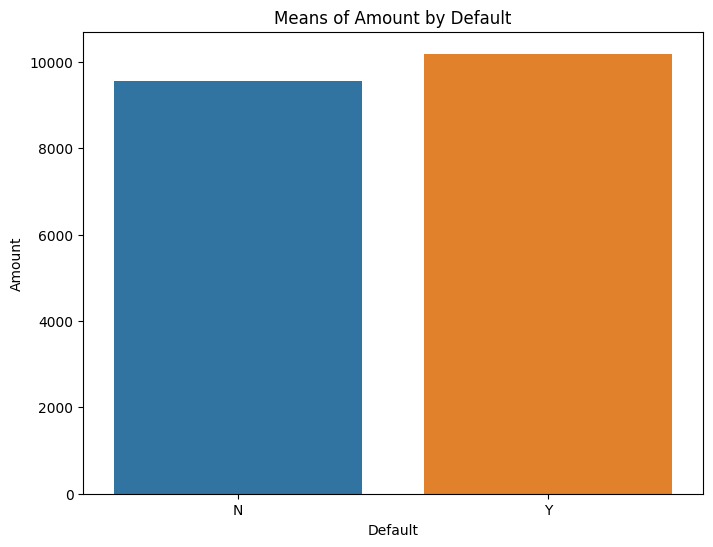

Means of Amount by Default:
  Default        Amount
0       N   9546.241648
1       Y  10188.599609



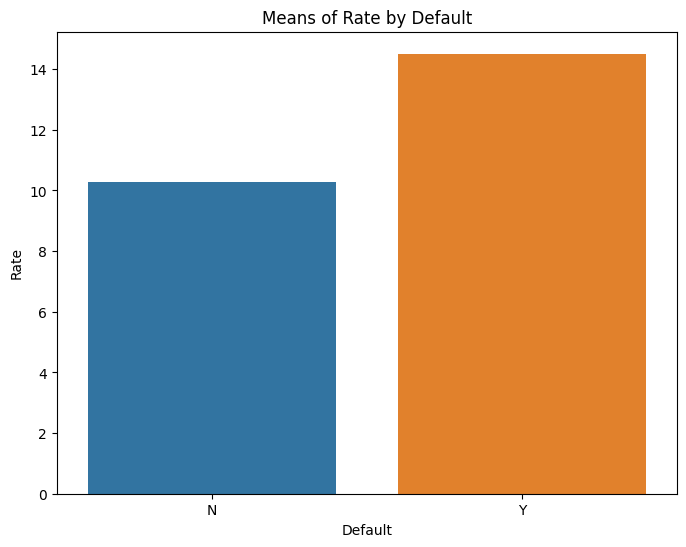

Means of Rate by Default:
  Default       Rate
0       N  10.287934
1       Y  14.509333



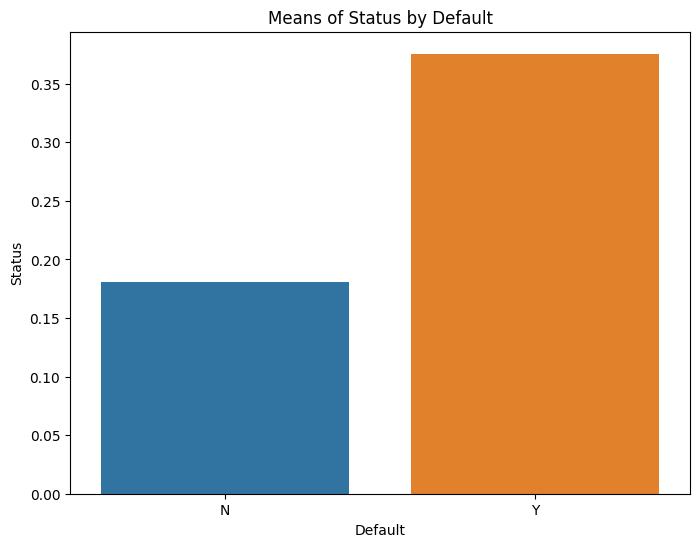

Means of Status by Default:
  Default    Status
0       N  0.180900
1       Y  0.375689



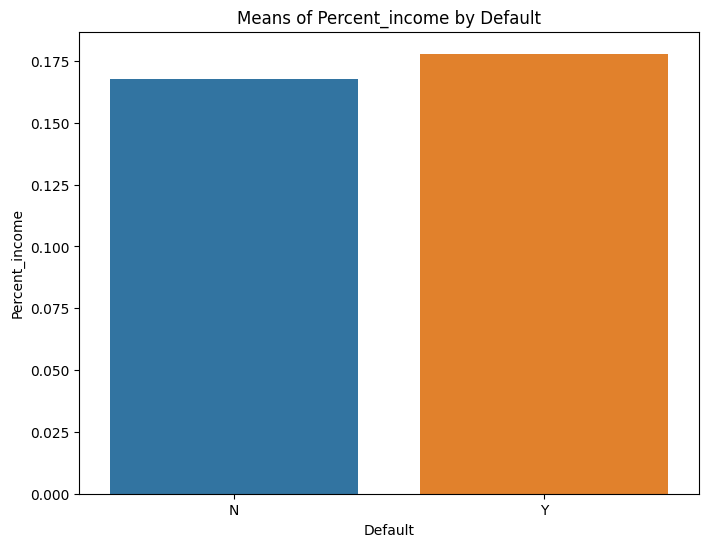

Means of Percent_income by Default:
  Default  Percent_income
0       N        0.167863
1       Y        0.177924



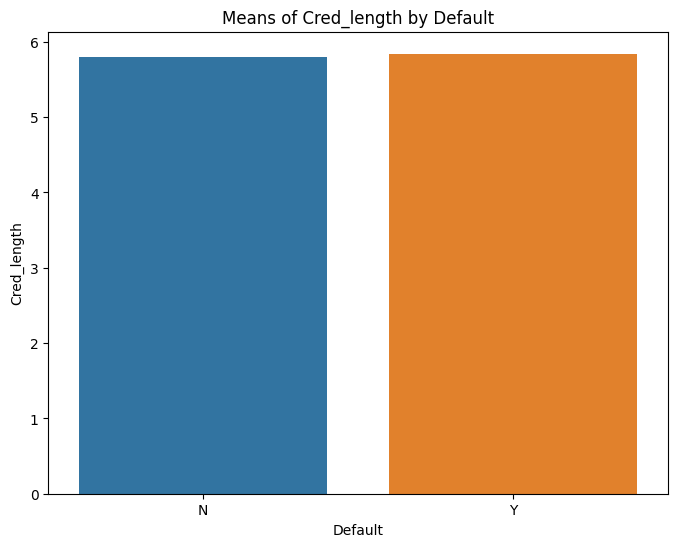

Means of Cred_length by Default:
  Default  Cred_length
0       N     5.797174
1       Y     5.842545

       Home   Default
0  MORTGAGE  0.150566
1     OTHER  0.271028
2       OWN  0.176007
3      RENT  0.199390


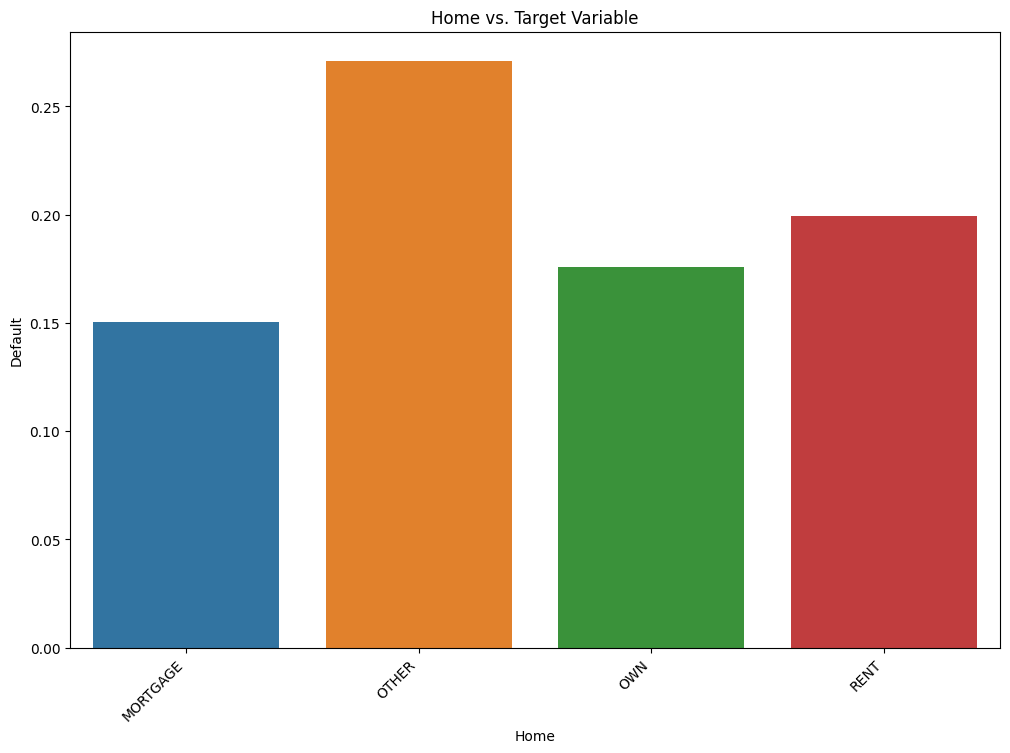

              Intent   Default
0  DEBTCONSOLIDATION  0.181908
1          EDUCATION  0.173056
2    HOMEIMPROVEMENT  0.194587
3            MEDICAL  0.174584
4           PERSONAL  0.174464
5            VENTURE  0.174775


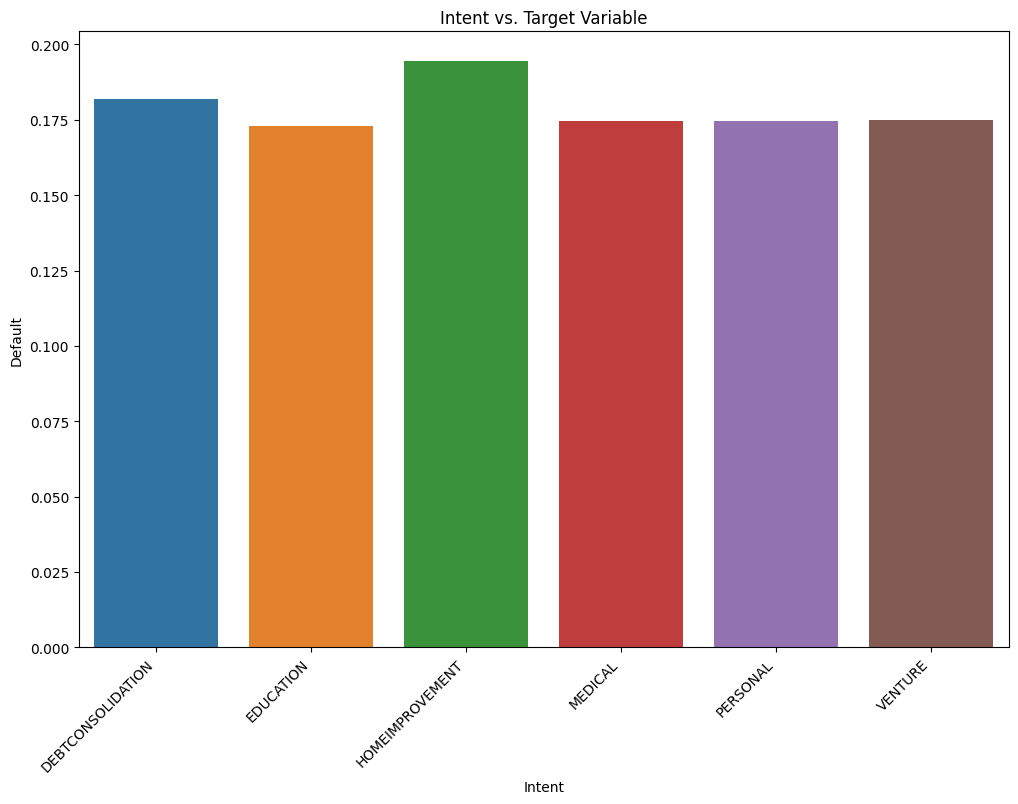

In [158]:
target_variable='Default'    
eda_bivariate_analysis(df, categorical_features,numeric_features,target_variable)

### Bivariate Analysis Insights
- People who are on rent, default rate is slightly higher
- People who are defaulting have higher avg interest rate 14% v/s 10%(who don't)

<a id="3.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Multivariate analysis</h3>

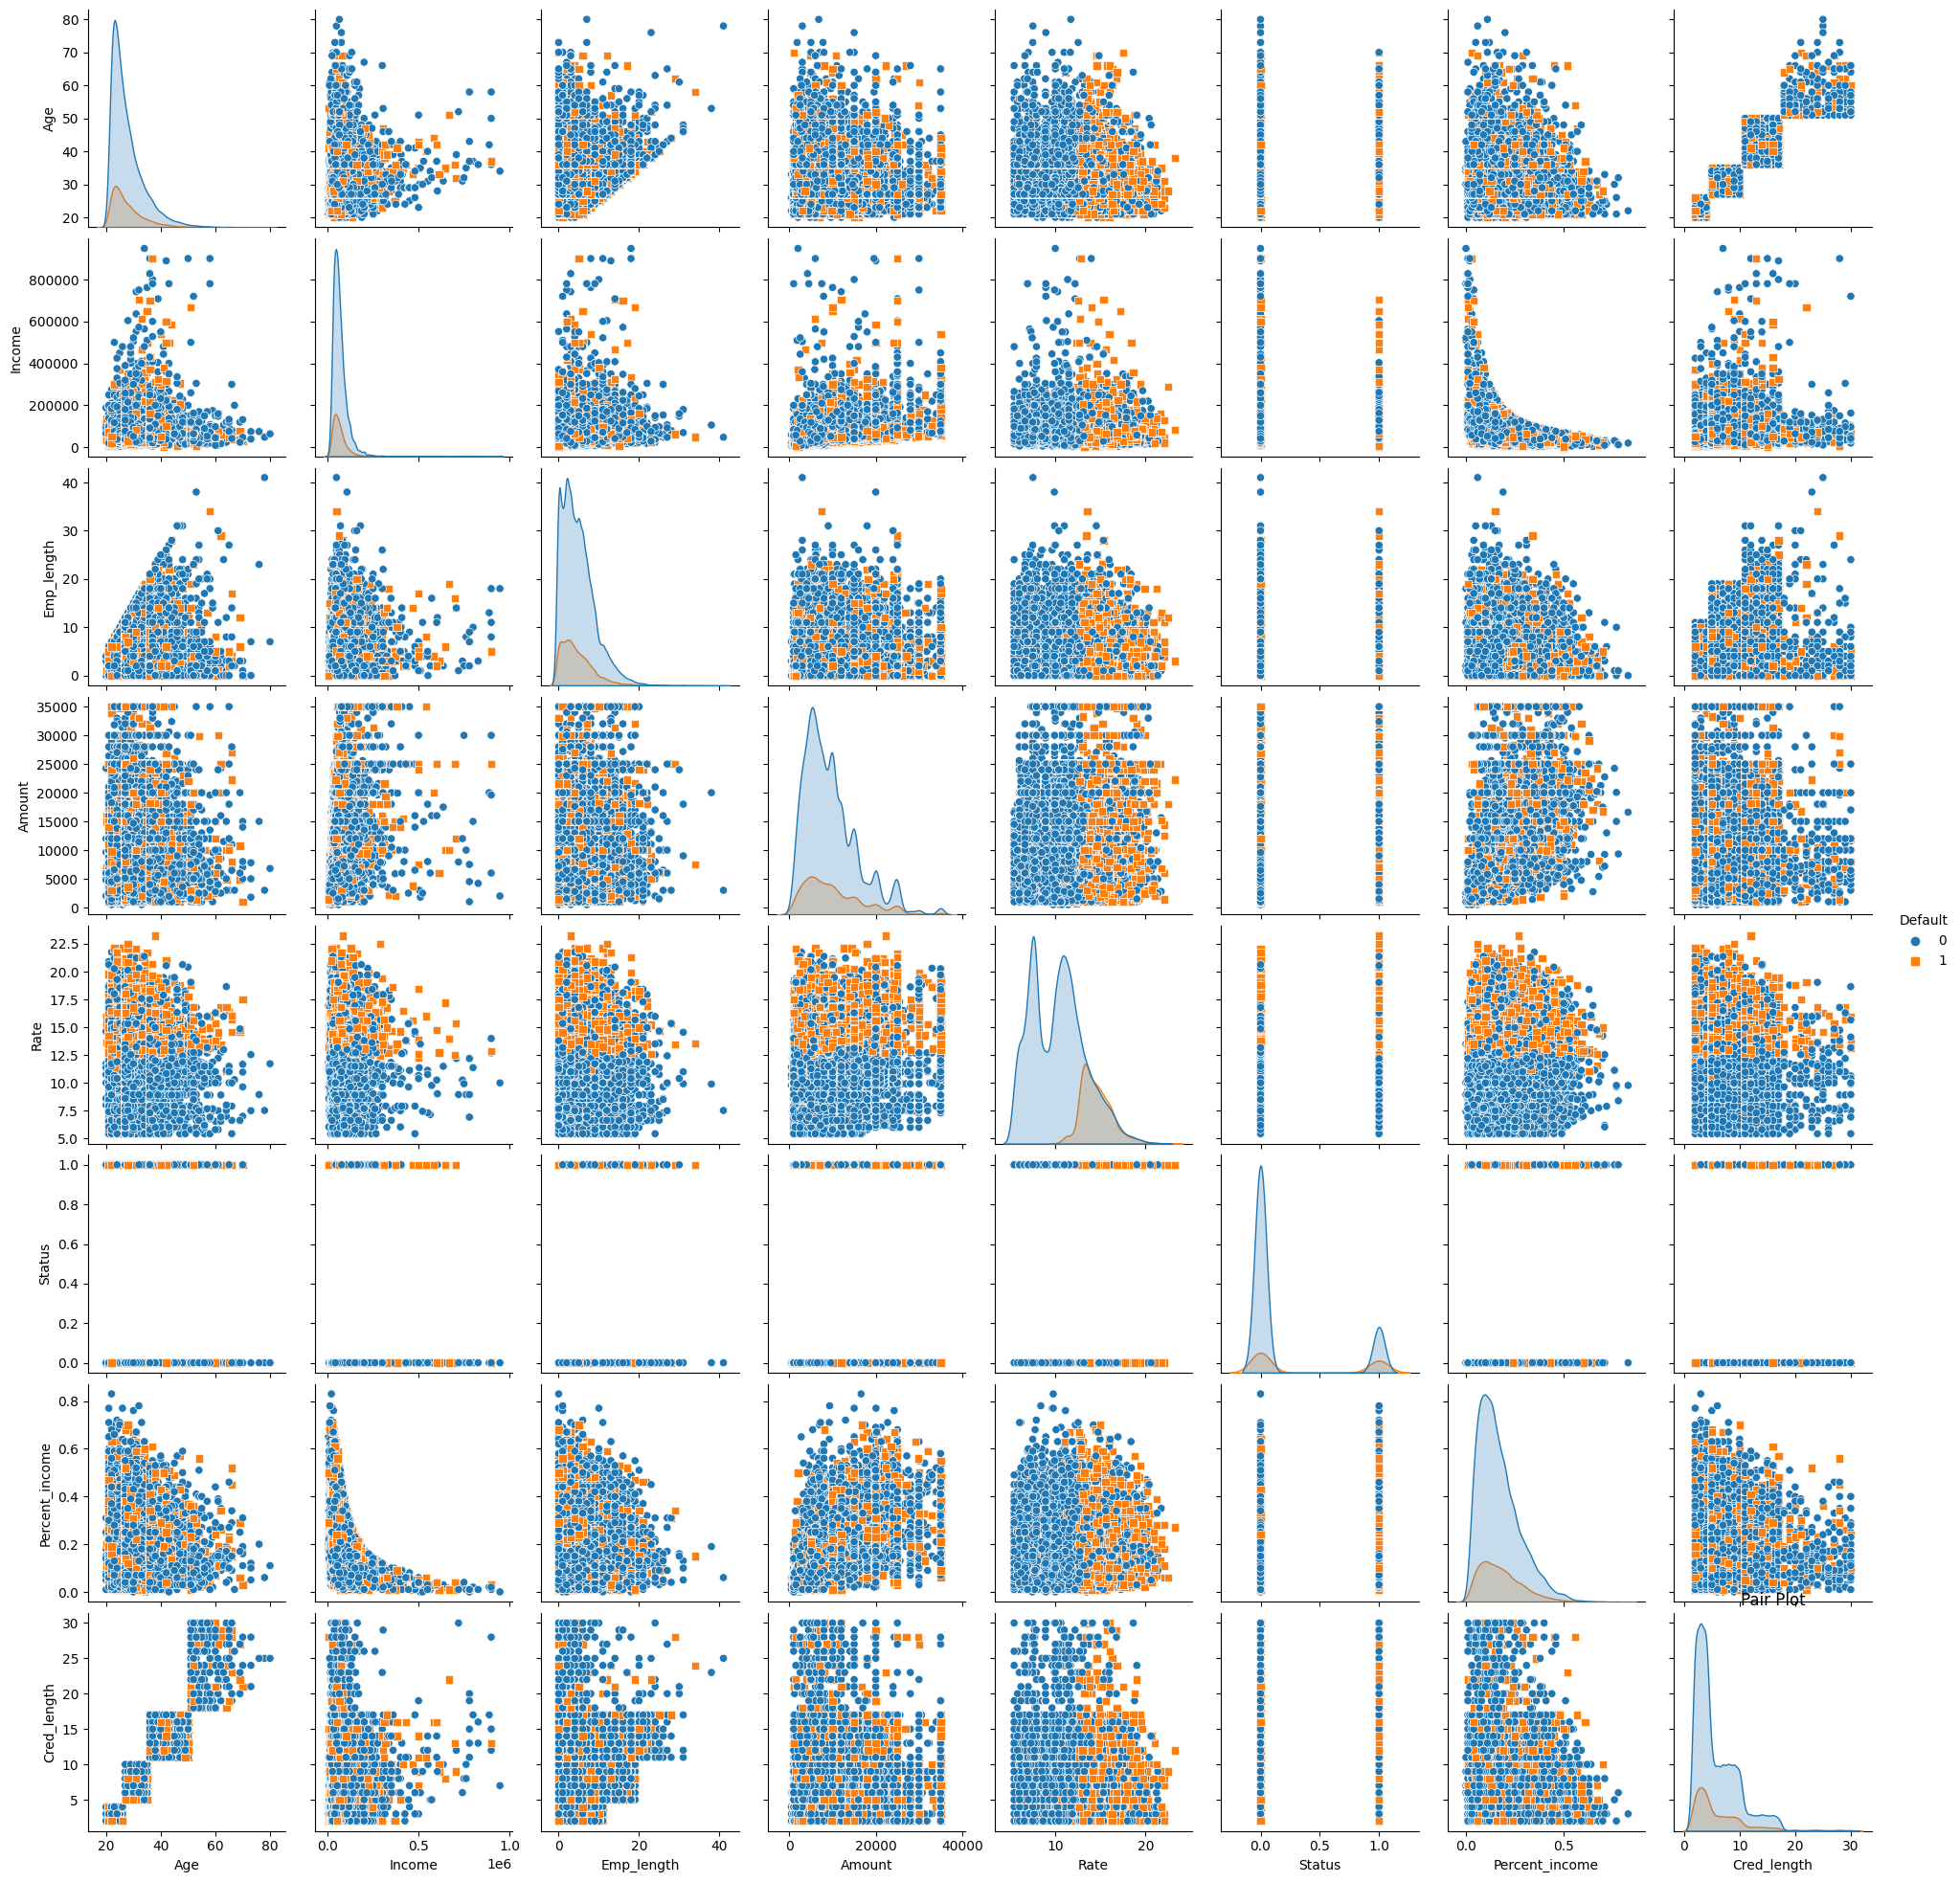

In [163]:
sns.pairplot(df, hue='Default', markers=["o", "s"])
plt.title('Pair Plot')
plt.show()

### Mutivariate insights
-  We can clearly see that rate is able to classify default